In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
columns = ['user','Activity','timestamp', 'Ax', 'Ay', 'Az']
df = pd.read_csv('./dataset/WISDM_ar_v1.1_raw.txt', header = None, names = columns)
df = df.dropna()

In [3]:
print('Total rows : ', len(df))
df.head()

Total rows :  1098203


,user,Activity,timestamp,Ax,Ay,Az
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


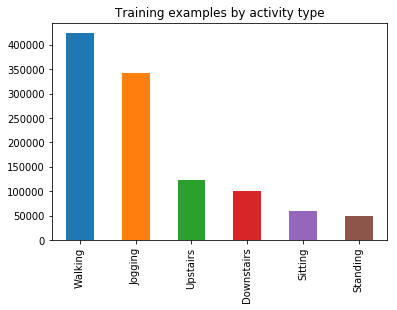

In [4]:
df['Activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

# Remove 2 columns

In [5]:
indexes = df[ (df['Activity'] == 'Downstairs') | (df['Activity'] == 'Upstairs') ].index
df.drop(indexes , inplace=True)

In [6]:
print('Total rows : ', len(df))
df.head()

Total rows :  874907


,user,Activity,timestamp,Ax,Ay,Az
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


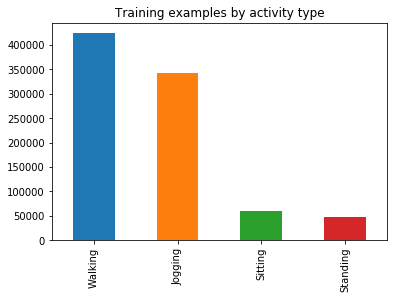

In [7]:
df['Activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [8]:
df['Activity'].value_counts()

Walking     424397
Jogging     342176
Sitting      59939
Standing     48395
Name: Activity, dtype: int64

# Map and Sort

In [9]:
df['Activity'] = df['Activity'].map({'Jogging': 0, 'Walking': 1, 'Standing': 2, 'Sitting': 3})

In [10]:
#df = df.sort_values('Activity')

In [11]:
df.head()

,user,Activity,timestamp,Ax,Ay,Az
0,33,0,49105962326000,-0.694638,12.680544,0.503953
1,33,0,49106062271000,5.012288,11.264028,0.953424
2,33,0,49106112167000,4.903325,10.882658,-0.081722
3,33,0,49106222305000,-0.612916,18.496431,3.023717
4,33,0,49106332290000,-1.184970,12.108489,7.205164


In [12]:
pd.options.mode.chained_assignment = None  # default='warn'
df['Ax'] = df['Ax'] / df['Ax'].max()
df['Ay'] = df['Ay'] / df['Ay'].max()
df['Az'] = df['Az'] / df['Az'].max()
# Round numbers
df = df.round({'Ax': 4, 'Ay': 4, 'Az': 4})

In [13]:
N_TIME_STEPS = 200
N_FEATURES = 3
step = 20
segments = []
labels = []

for i in range(0, len(df) - N_TIME_STEPS, step):
    xs = df['Ax'].values[i: i + N_TIME_STEPS]
    ys = df['Ay'].values[i: i + N_TIME_STEPS]
    zs = df['Az'].values[i: i + N_TIME_STEPS]
    label = stats.mode(df['Activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)
    
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(labels, dtype = np.int32)

In [14]:
Wisdm_X_train = reshaped_segments 
Wisdm_Y_train = labels

In [15]:
print(Wisdm_X_train.shape)
print(Wisdm_Y_train.shape)

(43736, 200, 3)
(43736,)


In [16]:
Wisdm_X_train = Wisdm_X_train.reshape((-1, 3, 1, 200))

In [17]:
print(Wisdm_X_train.shape)
print(Wisdm_Y_train)

(43736, 3, 1, 200)
[0 0 0 ... 3 3 3]


In [2]:
def load_wisdm_data():
    columns = ['user','Activity','timestamp', 'Ax', 'Ay', 'Az']
    df = pd.read_csv('./dataset/WISDM_ar_v1.1_raw.txt', header = None, names = columns)
    df = df.dropna()
    
    indexes = df[ (df['Activity'] == 'Downstairs') | (df['Activity'] == 'Upstairs') ].index
    df.drop(indexes , inplace=True)
    
    df['Activity'] = df['Activity'].map({'Jogging': 0, 'Walking': 1, 'Standing': 2, 'Sitting': 3})
    
    pd.options.mode.chained_assignment = None  # default='warn'
    df['Ax'] = df['Ax'] / df['Ax'].max()
    df['Ay'] = df['Ay'] / df['Ay'].max()
    df['Az'] = df['Az'] / df['Az'].max()
    # Round numbers
    df = df.round({'Ax': 4, 'Ay': 4, 'Az': 4})
    
    N_TIME_STEPS = 200
    N_FEATURES = 3
    step = 20
    segments = []
    labels = []

    for i in range(0, len(df) - N_TIME_STEPS, step):
        xs = df['Ax'].values[i: i + N_TIME_STEPS]
        ys = df['Ay'].values[i: i + N_TIME_STEPS]
        zs = df['Az'].values[i: i + N_TIME_STEPS]
        label = stats.mode(df['Activity'][i: i + N_TIME_STEPS])[0][0]
        segments.append([xs, ys, zs])
        labels.append(label)

    Wisdm_X_train = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
    Wisdm_Y_train = np.asarray(labels, dtype = np.int32)
    Wisdm_X_train = Wisdm_X_train.reshape((-1, 3, 1, 200))
    
    print('Wisdm_X_train.shape : ', Wisdm_X_train.shape)
    print('Wisdm_Y_train shape : ', Wisdm_Y_train.shape)
    print('Wisdm_Y_train values : ', Wisdm_Y_train)
    
    return Wisdm_X_train, Wisdm_Y_train

In [3]:
if __name__ == '__main__':
    load_wisdm_data()

Wisdm_X_train.shape :  (43736, 3, 1, 200)
Wisdm_Y_train shape :  (43736,)
Wisdm_Y_train values :  [0 0 0 ... 3 3 3]
